# Building a general purpose chatbot

In this practical exercise, your goal will be to implement the different tasks in a general purpose chatbot.

The code below will help you load the data.

In [1]:
!gdown --id 1JipPFr14hWBoQ0tnEJyTrOh5RoGFhaf3
!gdown --id 12DkcmwEEuitna9XJNYD9mBhDdaTzsWcS
!gdown --id 1iU73m8iDxEcqAmmLc4i_cudFOWJQMORY
!pip install stop-words
!pip install plotly
!python3 -m spacy download en_core_web_md

/home/sandro/.local/lib/python3.10/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1JipPFr14hWBoQ0tnEJyTrOh5RoGFhaf3
To: /home/sandro/NLP/Eval NLP1/NLP1-MiniChatbot/src/train.csv
100%|████████████████████████████████████████| 812k/812k [00:00<00:00, 3.00MB/s]
/home/sandro/.local/lib/python3.10/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=12DkcmwEEuitna9XJNYD9mBhDdaTzsWcS
To: /home/sandro/NLP/Eval NLP1/NLP1-MiniChatbot/src/val.csv
100%|████████████████████████████████████████| 165k/165k [00:00<00:00, 4.69MB/s]
/home/sandro/.local/lib/python3.10/site-packages/gdown/__main__.py:140: FutureWarnin

In [2]:
import pandas as pd

train_df = pd.read_csv('train.csv')
val_df = pd.read_csv('val.csv')
intent_responses = pd.read_csv('intent_response.csv')

train_df.head()

,sentence,intent
0,what expression would i use to say i love you ...,translate
1,can you tell me how to say 'i do not speak muc...,translate
2,"what is the equivalent of, 'life is good' in f...",translate
3,"tell me how to say, 'it is a beautiful morning...",translate
4,"if i were mongolian, how would i say that i am...",translate


In [3]:
val_df.head()

,sentence,intent
0,"in spanish, meet me tomorrow is said how",translate
1,"in french, how do i say, see you later",translate
2,how do you say hello in japanese,translate
3,how do i ask about the weather in chinese,translate
4,"how can i say ""cancel my order"" in french",translate


In [4]:
intent_responses.head()

,intent,response
0,translate,I can assist you in translating languages.
1,transfer,I'm here to help with transferring your reques...
2,timer,Let me set up a timer for you.
3,definition,I can provide you with definitions of words or...
4,meaning_of_life,"Ah, the eternal question! Let's explore the me..."


The dataset has a 100 examples for many intents ('translate', 'transfer', 'timer', 'definition', 'meaning_of_life',
 'insurance_change', 'find_phone', 'travel_alert', 'pto_request'...).

Your ultimate goal will be to build a general purpose assistant that detects the user intent and relevant entities and provides generic answers. You will also try to discover if there are out of scope intents in the dataset.

## Exercise

In this exercise, you are asked to implement the following:

1) EDA:
* Count the number of the classes and the number of examples in the training set.
* Display, on three histograms, the 20 words (without the english stop-words) with the highest counts for the classes 'transfer', 'timer' and 'meaning_of_life'.
* What is the average number of words in the sentences?

2) Data preparation:
* Create a new column `processed_sentence` where you remove stop words, punctuation and perform lemmatization on column `sentence`. You can use the library of your choice (spacy, nltk, other...). (Execution takes about 2/3 min with spacy model `en_core_web_md`).
* Separate the class `oos` from the datasets (remove it from `train_df`, `val_df` and put it in two new dataframes `train_df_oos` and `eval_df_oos`).


3) Topic modeling:
* Build the TF-IDF matrix without stop words using the column `sentence` from `train_df`.
* Run LSA on it with 20 components.
* Display the obtained topics (top 5 words with their weights).
* Display all the distinct intents from `train_df`.
* Do you see a relationship between the automatically extracted topics and the real intents?
* Try to find some topics in all oos sentence (train and eval). You can use LSA and also display the sentences. Are these topics different from the existing intents?

4) Classification:
* Build the bag of words matrices (word counts, not tfidf) for the column `sentence` and for the column `processed_sentence`, for train and eval.
* Train two Logistic Regression classifiers, one from each train matrix.
* Evaluate both with accuracy and the micro F1 score on the eval set.
* Switch to TF-IDF and see if the scores are better.
* Select the best approach, train it on the follow subset of intents and and display the evaluation confusion matrix: 'translate', 'transfer', 'definition', 'change_language', 'payday', 'replacement_card_duration', 'balance', 'pay_bill', 'spending_history', 'credit_score', 'report_lost_card', 'damaged_card', 'credit_limit', 'account_blocked', 'report_fraud', 'direct_deposit', 'interest_rate', 'credit_limit_change', 'card_declined'.
* Which pair of intents are the most confused together?

5) Named Entity Recognition:

For this task, let us focus on the following intents: **change_user_name, time, change_language, pto_request, travel_alert, timer, translate**.
* Display 10 random training sentences from each intent. What are all the kinds of entities to recognize in these sentences?
* Instantiate the spacy english model.
* Add rule based recognition for entities languages, dates, and countries (some code snippets are provided below to help)
* Display the entities detected by the model for the ten first sentences of the relevant intents.

6) Chatbot: Now that you are able to detect the intents and extract the entities, build a simple loop that executes this scenario:
* Ask the user to enter a sentence.
* Extract the entities and the user intent.
* Display the intent, the entities, and a generic response using `intent_responses`.

Play the code and ask the following questions to show what happens:
* "How do you say hello in French?"
* "I want to go on holidays from 2021-01-12 to 2021-01-25"
* "What is the weather in Germany?"
* "Can you set the language to Spanish?"

## 1) EDA

1) Comptons le nombre de classes dans le train.csv :

In [5]:
print(len(train_df['intent'].unique()))
train_df['intent'].unique()

151


array(['translate', 'transfer', 'timer', 'definition', 'meaning_of_life',
       'insurance_change', 'find_phone', 'travel_alert', 'pto_request',
       'improve_credit_score', 'fun_fact', 'change_language', 'payday',
       'replacement_card_duration', 'time', 'application_status',
       'flight_status', 'flip_coin', 'change_user_name',
       'where_are_you_from', 'shopping_list_update', 'what_can_i_ask_you',
       'maybe', 'oil_change_how', 'restaurant_reservation', 'balance',
       'confirm_reservation', 'freeze_account', 'rollover_401k',
       'who_made_you', 'distance', 'user_name', 'timezone', 'next_song',
       'transactions', 'restaurant_suggestion', 'rewards_balance',
       'pay_bill', 'spending_history', 'pto_request_status',
       'credit_score', 'new_card', 'lost_luggage', 'repeat', 'mpg',
       'oil_change_when', 'yes', 'travel_suggestion', 'insurance',
       'todo_list_update', 'reminder', 'change_speed', 'tire_pressure',
       'no', 'apr', 'nutrition_info', 'c

On obtient ainsi 151 classes différentes dans le train.csv

On cherche aussi à savoir le nombre d'exemple présent :

In [6]:
train_df.isnull().sum()

sentence    0
intent      0
dtype: int64

In [7]:
print(len(train_df))

15100


On constate ainsi que nous avons 15100 exemples dans notre dataset.

2) Afficher l'histogramme des 20 mots les plus représentés pour les classes suivantes: 'transfer', 'timer' and 'meaning_of_life'

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub(f'[{string.punctuation}]', '', text) #remove punctuation (list available in string.punctuation)
    text = re.sub('\n', '', text) #remove new line
    return text

def count_words(text):
    words = text.split(' ')
    return len(words)

train_df['new_sentence'] = train_df['sentence'].apply(clean_text) #apply cleaning
train_df['sentence_len'] = train_df['sentence'].apply(count_words)

from stop_words import get_stop_words

import numpy as np
def get_top_n_words_without_stop_words(corpus, n=None):
    vectorizer = CountVectorizer(stop_words=get_stop_words('en'))
    X = vectorizer.fit_transform(corpus)
    words = vectorizer.get_feature_names_out()
    counts = X.toarray().sum(axis=0)
    top_idx = np.argsort(-counts)[:n]
    top_words = words[top_idx]
    top_values = counts[top_idx]
    return top_words, top_values

common_words, common_words_ct = get_top_n_words_without_stop_words(train_df[train_df['intent'] == 'transfer']['new_sentence'], 20)
df1 = pd.DataFrame({'word':common_words , 'count':common_words_ct})
df1_sorted = df1.sort_values('count',ascending=False)

import plotly.express as px

fig = px.bar(df1_sorted, x='word', y='count', title='Top 20 words in transfer')
fig.show()

/home/sandro/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'can', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


In [9]:
common_words, common_words_ct = get_top_n_words_without_stop_words(train_df[train_df['intent'] == 'timer']['new_sentence'], 20)
df1 = pd.DataFrame({'word':common_words , 'count':common_words_ct})
df1_sorted = df1.sort_values('count',ascending=False)

import plotly.express as px

fig = px.bar(df1_sorted, x='word', y='count', title='Top 20 words in timer')
fig.show()

/home/sandro/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:404: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'can', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.



In [10]:
common_words, common_words_ct = get_top_n_words_without_stop_words(train_df[train_df['intent'] == 'meaning_of_life']['new_sentence'], 20)
df1 = pd.DataFrame({'word':common_words , 'count':common_words_ct})
df1_sorted = df1.sort_values('count',ascending=False)

import plotly.express as px

fig = px.bar(df1_sorted, x='word', y='count', title='Top 20 words in timer')
fig.show()

/home/sandro/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:404: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'can', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.



3) Nombre de mots moyen dans une phrase

In [11]:
train_df.head()

,sentence,intent,new_sentence,sentence_len
0,what expression would i use to say i love you ...,translate,what expression would i use to say i love you ...,15
1,can you tell me how to say 'i do not speak muc...,translate,can you tell me how to say i do not speak much...,15
2,"what is the equivalent of, 'life is good' in f...",translate,what is the equivalent of life is good in french,10
3,"tell me how to say, 'it is a beautiful morning...",translate,tell me how to say it is a beautiful morning i...,12
4,"if i were mongolian, how would i say that i am...",translate,if i were mongolian how would i say that i am ...,13


In [12]:
train_df['sentence_len'].mean()

8.33092715231788

On a ainsi une moyenne de 39,89 mots par phrases

## 2) Data preparation:

1) Crée colonne processed_sentence sans stop_word, sans ponctuation et en utilisant lemmatization

In [13]:
import pandas as pd
import spacy

# Load the csv file into a pandas dataframe
train_df = train_df[train_df['sentence'].apply(lambda x:isinstance(x,str))]

# Load the spacy model for French
nlp = spacy.load('en_core_web_md')

# Define a function to preprocess the text
def preprocess_text(text):
    # Convert the text to lowercase
    output_text = text.lower()
    # Tokenize the text using spacy
    tokens = nlp(output_text)
    # Remove stopwords, punctuation, and get lemma using tokens attributes like 'is_stop'
    lemmas = [token.lemma_ for token in tokens if not token.is_punct and not token.is_stop]
    # Join the lemmatized tokens back into a string
    clean_text = ' '.join(lemmas)
    return clean_text

# Apply the preprocess_text function to the "sentence" column to create a new column "processed_sentence"
train_df['processed_sentence'] = train_df['sentence'].apply(preprocess_text)

In [14]:
train_df.head()

,sentence,intent,new_sentence,sentence_len,processed_sentence
0,what expression would i use to say i love you ...,translate,what expression would i use to say i love you ...,15,expression use love italian
1,can you tell me how to say 'i do not speak muc...,translate,can you tell me how to say i do not speak much...,15,tell speak spanish spanish
2,"what is the equivalent of, 'life is good' in f...",translate,what is the equivalent of life is good in french,10,equivalent life good french
3,"tell me how to say, 'it is a beautiful morning...",translate,tell me how to say it is a beautiful morning i...,12,tell beautiful morning italian
4,"if i were mongolian, how would i say that i am...",translate,if i were mongolian how would i say that i am ...,13,mongolian tourist


IDEM POUR EVAL ?

In [15]:
import pandas as pd
import spacy

# Load the csv file into a pandas dataframe
val_df = val_df[val_df['sentence'].apply(lambda x:isinstance(x,str))]

# Load the spacy model for French
nlp = spacy.load('en_core_web_md')

# Define a function to preprocess the text
def preprocess_text(text):
    # Convert the text to lowercase
    output_text = text.lower()
    # Tokenize the text using spacy
    tokens = nlp(output_text)
    # Remove stopwords, punctuation, and get lemma using tokens attributes like 'is_stop'
    lemmas = [token.lemma_ for token in tokens if not token.is_punct and not token.is_stop]
    # Join the lemmatized tokens back into a string
    clean_text = ' '.join(lemmas)
    return clean_text

# Apply the preprocess_text function to the "sentence" column to create a new column "processed_sentence"
val_df['processed_sentence'] = val_df['sentence'].apply(preprocess_text)

2) Séparer les classes 'oos' du reste :

In [16]:
train_df_oos = train_df[train_df['intent'] == 'oos']
train_df = train_df.loc[train_df['intent'] != 'oos']
eval_df_oos = val_df[val_df['intent'] == 'oos']
val_df = val_df.loc[val_df['intent'] != 'oos']
train_df

,sentence,intent,new_sentence,sentence_len,processed_sentence
0,what expression would i use to say i love you ...,translate,what expression would i use to say i love you ...,15,expression use love italian
1,can you tell me how to say 'i do not speak muc...,translate,can you tell me how to say i do not speak much...,15,tell speak spanish spanish
2,"what is the equivalent of, 'life is good' in f...",translate,what is the equivalent of life is good in french,10,equivalent life good french
3,"tell me how to say, 'it is a beautiful morning...",translate,tell me how to say it is a beautiful morning i...,12,tell beautiful morning italian
4,"if i were mongolian, how would i say that i am...",translate,if i were mongolian how would i say that i am ...,13,mongolian tourist
...,...,...,...,...,...
14995,can you explain why my card was declined,card_declined,can you explain why my card was declined,8,explain card decline
14996,how come starbucks declined my card when i tri...,card_declined,how come starbucks declined my card when i tri...,14,come starbuck decline card try use pay
14997,how come my card was not accepted yesterday,card_declined,how come my card was not accepted yesterday,8,come card accept yesterday
14998,find out what happened to make my card get dec...,card_declined,find out what happened to make my card get dec...,11,find happen card decline yesterday


## 3) Topic modeling:

1) Avec sentence, crée la matrice TF-IDF sans stop_word

In [17]:
#supprime ponctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))
vectorizer = TfidfVectorizer(stop_words=get_stop_words('en'), preprocessor=remove_punctuation) # TFIDF
corpus = train_df['sentence']
vectors = vectorizer.fit_transform(corpus)
vectors.toarray()

/home/sandro/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:404: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['arent', 'cant', 'couldnt', 'didnt', 'doesnt', 'dont', 'hadnt', 'hasnt', 'havent', 'hed', 'hell', 'heres', 'hes', 'hows', 'id', 'ill', 'im', 'isnt', 'ive', 'lets', 'mustnt', 'shant', 'shed', 'shell', 'shes', 'shouldnt', 'thats', 'theres', 'theyd', 'theyll', 'theyre', 'theyve', 'wasnt', 'wed', 'well', 'werent', 'weve', 'whats', 'whens', 'wheres', 'whos', 'whys', 'wont', 'wouldnt', 'youd', 'youll', 'youre', 'youve'] not in stop_words.



array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

2) Effectuer LSA dessus avec 20 composants

In [18]:
from sklearn.decomposition import TruncatedSVD

n_components = 20
lsa = TruncatedSVD(n_components=n_components)
lsa_tdm = lsa.fit_transform(vectors)
lsa

TruncatedSVD(n_components=20)

3) Afficher les sujets obtenus (5 premiers mots aves poids)

In [19]:
for sujet, component in enumerate(lsa.components_):
    print('Sujet', sujet, ':')
    top_words = [(vectorizer.get_feature_names_out()[idx], component[idx]) for idx in np.argsort(-component)[:5]]
    for word, weight in top_words:
        print(f"{word}: {weight}")
    print()

Sujet 0 :
can: 0.42575836491992985
card: 0.3422930369231367
tell: 0.30355006051323985
credit: 0.29971357427710654
need: 0.2500860167005815

Sujet 1 :
card: 0.5249906095697869
credit: 0.4858201197303953
limit: 0.16718044504535687
score: 0.13459159207051558
apr: 0.09581542586543627

Sujet 2 :
need: 0.49354699254191914
know: 0.40281105041391063
oil: 0.1803709462069572
change: 0.17863095957751465
card: 0.11336546815500684

Sujet 3 :
list: 0.47175441832752585
please: 0.3647919844751427
shopping: 0.30330292844560836
know: 0.21629778045774037
whats: 0.11002657153623444

Sujet 4 :
please: 0.4642398681118438
change: 0.3714779293417194
oil: 0.2925811850235531
list: 0.18984358986392402
shopping: 0.1124372431916949

Sujet 5 :
list: 0.5125270743510987
shopping: 0.3581934945546106
get: 0.18690005154406533
can: 0.17458852682185708
need: 0.15871680888370074

Sujet 6 :
tell: 0.44605079578676055
name: 0.3222799515604131
change: 0.2578104774113265
oil: 0.2025411574405026
whats: 0.20028141896868976

Sujet

4) Afficher toutes les intentions distinctes de train_df

In [20]:
for intent in train_df['intent'].unique():
    print(intent)

translate
transfer
timer
definition
meaning_of_life
insurance_change
find_phone
travel_alert
pto_request
improve_credit_score
fun_fact
change_language
payday
replacement_card_duration
time
application_status
flight_status
flip_coin
change_user_name
where_are_you_from
shopping_list_update
what_can_i_ask_you
maybe
oil_change_how
restaurant_reservation
balance
confirm_reservation
freeze_account
rollover_401k
who_made_you
distance
user_name
timezone
next_song
transactions
restaurant_suggestion
rewards_balance
pay_bill
spending_history
pto_request_status
credit_score
new_card
lost_luggage
repeat
mpg
oil_change_when
yes
travel_suggestion
insurance
todo_list_update
reminder
change_speed
tire_pressure
no
apr
nutrition_info
calendar
uber
calculator
date
carry_on
pto_used
schedule_maintenance
travel_notification
sync_device
thank_you
roll_dice
food_last
cook_time
reminder_update
report_lost_card
ingredient_substitution
make_call
alarm
todo_list
change_accent
w2
bill_due
calories
damaged_card
res

5) Voyez-vous une relation entre les sujets extraits automatiquement et les intentions réelles ?

    Oui, on contate une relation entre les sujets extraits et les intentions réelles. Par exemple, le sujet 1 nous parle de carte de crédit, cela nous fait penser à des transferts d'argent. On retrouve aussi le mot find dans un des sujets et l'une des intentions est find_phone.

6) Trouver les sujets des train_df_oos et eval_df_oos

In [21]:
# concat les phrases OOS
oos = pd.concat([train_df_oos, eval_df_oos])

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))
vectorizer = TfidfVectorizer(stop_words=get_stop_words('en'), preprocessor=remove_punctuation) # TFIDF
corpus = train_df_oos['sentence']
vectors = vectorizer.fit_transform(corpus)
vectors.toarray()

#LSA
n_components = 20
lsa_oss = TruncatedSVD(n_components=n_components)
lsa_oos_vectors = lsa_oss.fit_transform(vectors)

# Affichage des sujets obtenus
print("Sujets obtenus à partir des phrases OOS:")
for i, component in enumerate(lsa_oss.components_):
    top_words_idx = np.argsort(-component)[:5]
    top_words = [vectorizer.get_feature_names_out()[idx] for idx in top_words_idx]
    print(f"Sujet {i+1}: {', '.join(top_words)}")


Sujets obtenus à partir des phrases OOS:
Sujet 1: start, marketing, character, saas, firm
Sujet 2: many, next, game, bulls, chicago
Sujet 3: marketing, can, next, saas, game
Sujet 4: next, game, nintendo, football, created
Sujet 5: alpha, males, mean, want, animals
Sujet 6: can, year, radiohead, much, released
Sujet 7: radiohead, much, year, marketing, saas
Sujet 8: whats, first, saas, movies, character
Sujet 9: created, nintendo, toyota, direct, bulls
Sujet 10: evolution, first, theory, considered, stage
Sujet 11: born, bryant, kobe, john, denver
Sujet 12: released, year, star, trek, redemption
Sujet 13: bulls, chicago, coach, players, college
Sujet 14: personality, mean, type, compatible, infjs
Sujet 15: long, take, winter, wire, transfers
Sujet 16: best, whats, super, classical, piano
Sujet 17: college, football, overtime, completing, benefits
Sujet 18: current, movies, captain, ship, trend
Sujet 19: current, war, captain, ship, market
Sujet 20: war, involved, radiohead, years, kore

Oui, il semblerait que ces sujets soient différents des intentions existantes

## 4) Classification:

1) Constuire Bag Of Word pour train et eval

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer1 = CountVectorizer(stop_words='english')
vectorizer2 = CountVectorizer(stop_words='english')
vectors_train_sentence = vectorizer1.fit_transform(train_df['sentence'])
vectors_train_processed = vectorizer2.fit_transform(train_df['processed_sentence'])
vectors_eval_sentence = vectorizer1.transform(val_df['sentence'])
vectors_eval_processed = vectorizer2.transform(val_df['processed_sentence'])
print(vectorizer.vocabulary_)

print(vectors_train_sentence.toarray()) # Sac de mot pour train['setence']
print(vectors_train_processed.toarray())
print(vectors_eval_sentence.toarray())
print(vectors_eval_processed.toarray())

{'much': 160, 'overdraft': 175, 'fee': 101, 'bank': 25, 'exponents': 96, 'preformed': 196, 'multiplication': 161, 'order': 172, 'operations': 171, 'size': 227, 'wipers': 284, 'car': 47, 'take': 249, 'dipstick': 80, 'share': 222, 'aapl': 1, 'glue': 113, 'made': 145, 'headlines': 116, 'area': 18, 'largest': 133, 'state': 240, 'us': 272, 'current': 75, 'market': 151, 'trend': 266, 'popular': 193, 'airline': 7, 'formula': 108, 'circumference': 54, 'circle': 53, 'ways': 278, 'reduce': 201, 'spending': 233, 'time': 256, 'louvre': 144, 'open': 170, 'local': 141, 'stations': 242, 'covering': 71, 'moral': 157, 'march': 150, 'raleigh': 199, 'februaryu': 100, 'many': 149, 'planets': 186, 'discovered': 82, 'change': 49, 'billing': 32, 'address': 5, 'online': 169, 'line': 138, 'credit': 73, 'remove': 205, 'coffee': 59, 'blemish': 33, 'expensive': 94, 'apple': 17, 'can': 43, 'find': 103, 'cruise': 74, 'control': 70, 'kia': 130, 'sportage': 234, '2010': 0, 'sides': 226, 'hexagon': 118, 'fast': 99, 'a

2)  Crée 2 Logistic Regression pour chaque matrice de train

In [23]:
from sklearn.linear_model import LogisticRegression

LR_sentence = LogisticRegression(max_iter=1000)
LR_sentence.fit(vectors_train_sentence, train_df['intent'])

LR_processed = LogisticRegression(max_iter=1000)
LR_processed.fit(vectors_train_processed, train_df['intent'])


LogisticRegression(max_iter=1000)

3) Évaluer avec précision et micro F1 score sur Eval

In [24]:
from sklearn.metrics import accuracy_score, f1_score

LR_sentence_pred = LR_sentence.predict(vectors_eval_sentence)
print('Sentence :')
print('precision:', accuracy_score(val_df['intent'], LR_sentence_pred))
print('F1:', f1_score(val_df['intent'], LR_sentence_pred, average='micro'))

LR_processed_pred = LR_processed.predict(vectors_eval_processed)
print('Processed :')
print('precision:', accuracy_score(val_df['intent'], LR_processed_pred))
print('F1:', f1_score(val_df['intent'], LR_processed_pred, average='micro'))

Sentence :
precision: 0.8163333333333334
F1: 0.8163333333333335
Processed :
precision: 0.8066666666666666
F1: 0.8066666666666665


4) On essaie avec TF-IDF

In [25]:
vectorizer1 = TfidfVectorizer(stop_words='english')
vectorizer2 = TfidfVectorizer(stop_words='english')

vectors_train_sentence = vectorizer1.fit_transform(train_df['sentence'])
vectors_train_processed = vectorizer2.fit_transform(train_df['processed_sentence'])
vectors_eval_sentence = vectorizer1.transform(val_df['sentence'])
vectors_eval_processed = vectorizer2.transform(val_df['processed_sentence'])

LR_sentence_tfidf = LogisticRegression(max_iter=1000)
LR_sentence_tfidf.fit(vectors_train_sentence, train_df['intent'])

LR_processed_tfidf = LogisticRegression(max_iter=1000)
LR_processed_tfidf.fit(vectors_train_processed, train_df['intent'])


LR_sentence_pred_tfidf = LR_sentence_tfidf.predict(vectors_eval_sentence)
print('Sentence (TF-IDF):')
print('Precision:', accuracy_score(val_df['intent'], LR_sentence_pred_tfidf))
print('F1:', f1_score(val_df['intent'], LR_sentence_pred_tfidf, average='micro'))

LR_processed_pred_tfidf = LR_processed_tfidf.predict(vectors_eval_processed)
print('Processed (TF-IDF):')
print('Precision:', accuracy_score(val_df['intent'], LR_processed_pred_tfidf))
print('F1:', f1_score(val_df['intent'], LR_processed_pred_tfidf, average='micro'))


Sentence (TF-IDF):
Precision: 0.811
F1: 0.811
Processed (TF-IDF):
Precision: 0.8026666666666666
F1: 0.8026666666666666


On peut donc conclure que les scores sont un peu moins bons que ceux de LogisticRegression

5) Sélectionnez la meilleure approche, entraînez-la sur le sous-ensemble d'intentions suivant et affichez la matrice de confusion d'évaluation

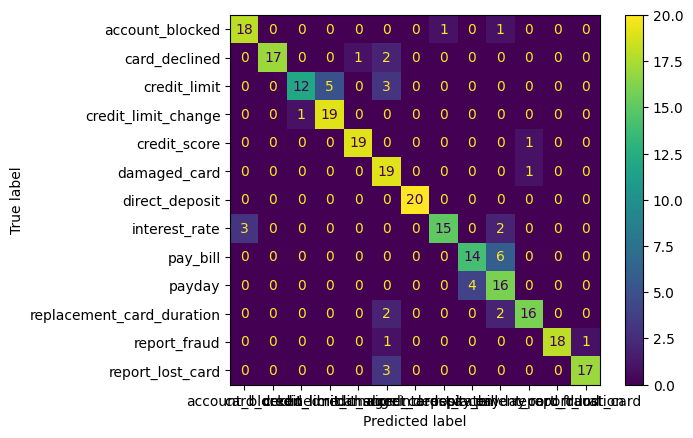

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

# sous-ensemble d'intentions
sousEnsemble = ['traduire', 'transfert', 'définition', 'change_langue', 'payday', 'replacement_card_duration', 'solde', 'pay_bill', 'sending_history', 'credit_score', 'report_lost_card', 'damaged_card', 'credit_limit', 'account_blocked', 'report_fraud', 'direct_deposit', 'interest_rate', 'credit_limit_change', 'card_declined']

new_train_df = train_df[train_df['intent'].isin(sousEnsemble)]
new_val_df = val_df[val_df['intent'].isin(sousEnsemble)]

vectorizer1 = CountVectorizer(stop_words='english')
vectors_train_sentence = vectorizer1.fit_transform(new_train_df['sentence'])
vectors_eval_sentence = vectorizer1.transform(new_val_df['sentence'])

LR_best = LogisticRegression(max_iter=1000)
LR_best.fit(vectors_train_sentence, new_train_df['intent'])


LR_simple_pred = cross_val_predict(LR_best, vectors_eval_sentence, new_val_df['intent'], cv=5)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(new_train_df['intent'])
y_test = le.transform(new_val_df['intent'])

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(new_val_df['intent'], LR_simple_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=le.classes_)
disp.plot()


6) Quelles paires d'intentions sont les plus confondues ?

Les paires d'intention les plus confondues sont pay_bill avec payday

## 5) Named Entity Recognition:

1) On se concentre sur certaines intentions

In [27]:
selected_intentions = ['change_user_name', 'time', 'change_lingual', 'pto_request', 'travel_alert', 'timer', 'Translate']
selected_train_df = train_df[train_df['intent'].isin(selected_intentions)]
selected_val_df = val_df[val_df['intent'].isin(selected_intentions)]

2) Afficher 10 phrases pour chaque intention

In [28]:
import random

for intent in selected_intentions:
    print(intent,':')
    temp_train_df = selected_train_df[selected_train_df['intent'] == intent]
    random_sentences = temp_train_df.sample(n=min(10, len(temp_train_df)))['sentence'].tolist()
    for i, sentence in enumerate(random_sentences, start=1):
        print(f"{i}. {sentence}")
    print()

change_user_name :
1. i'd rather have you call be ray ray
2. you can call me john
3. the name i go by is sandy
4. call me dad
5. i want you to call me lord
6. i'd like you to call me something different
7. call me mary
8. call me carrie
9. my name is jim
10. i go by the name jim

time :
1. i want to know what time it is
2. what time is it
3. in pacific time, what's the current time
4. in the eastern timezone, what time is it now
5. what is the time right now in the hst timezone
6. what time is it in the central standard timezone
7. what's the current time now cst
8. what time is it in the eastern standard timezone
9. current time, please
10. what time is it on the pacific coast right now

change_lingual :

pto_request :
1. what do i do to request a vacation
2. can you put in a pto request for march 4 to march 6 for me
3. can i take a pto for two days, starting on february 7
4. let's do a personal pto request for the dates may 12th to may 15th
5. am i able to place a pto request for feb

Les entités à reconnaitre sont les Noms, les adresses, les lieux, les dates, les organisations ...

3) Instancier le modèle anglais spacy

In [29]:
import spacy
nlp = spacy.load("en_core_web_sm", disable = ['tagger', 'parser', 'ner'])

4) Reconnaissance basée sur des règles pour les langues, les dates et les pays des entités 

In [30]:
!pip install geonamescache
!pip install pycountry

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3
[notice] To update, run: pip install --upgrade pip


In [31]:
# getting a list of countries  using pycountry
import pycountry
countries = [x.name for x in list(pycountry.countries)]

In [32]:
# hard coded languages
languages = [
    "English",
    "Spanish",
    "French",
    "German",
    "Chinese",
    "Hindi",
    "Arabic",
    "Bengali",
    "Russian",
    "Portuguese",
    "Japanese",
    "Punjabi",
    "Bengali",
    "Telugu",
    "Marathi",
    "Tamil",
    "Urdu",
    "Turkish",
    "Italian",
    "Vietnamese",
    "Korean",
    "Thai",
    "Malay",
    "Persian",
    "Polish",
    "Cantonese",
    "Ukrainian",
    "Romanian",
    "Dutch",
    "Swedish",
    "Gujarati",
    "Indonesian",
    "Greek",
    "Czech",
    "Hebrew",
    "Danish",
    "Norwegian",
    "Finnish",
    "Hungarian",
    "Slovak",
    "Bulgarian",
    "Croatian",
    "Serbian",
    "Slovenian",
    "Lithuanian",
    "Latvian",
    "Estonian",
    "Kazakh",
    "Georgian",
    "Tatar",
    "Kyrgyz",
    "Belarusian",
    "Mongolian",
    "Azerbaijani",
    "Uzbek",
    "Tajik",
    "Turkmen",
    "Armenian",
    "Bosnian",
    "Albanian",
    "Macedonian",
    "Montenegrin",
    "Bislama",
    "Fijian",
    "Hawaiian",
    "Samoan",
    "Tongan",
    "Tahitian",
    "Marshallese",
    "Palauan",
    "Chamorro"
]

In [33]:
ruler = nlp.add_pipe("entity_ruler")
patterns = [{"label": "COUNTRY", "pattern": [{"LOWER":ct.lower()}]} for ct in countries]
ruler.add_patterns(patterns)
date_patterns = [
    {"label": "DATE", "pattern": [{"LOWER": {"IN": ["january", "february", "march","april","may","june","july","august","september","october","november","december"]}},{"TEXT": {"REGEX": "^[0-9]+"}}]},
    {"label": "DATE", "pattern": [{"LOWER": {"IN": ["january", "february", "march","april","may","june","july","august","september","october","november","december"]}}]},
    {"label": "DATE", "pattern": [{"TEXT": {"REGEX": r"^\d{4}-\d{2}-\d{2}$"}}]}
]

# Ajouter les motifs de langue et de date à l'entity ruler
ruler.add_patterns([{"label": "LANGUAGE", "pattern": [{"LOWER": lang.lower()}]} for lang in languages])
ruler.add_patterns(date_patterns)

5) Afficher les entités detectées

In [34]:
#test 
doc = nlp("Test France speak Cantonese in January 16")
print([(ent.text, ent.label_) for ent in doc.ents])

for intent in selected_intentions:
    print("Intent:",intent)
    relevant_sentences = selected_train_df[selected_train_df['intent'] == intent]['sentence'].head(10)
    for i, sentence in enumerate(relevant_sentences):
        doc = nlp(sentence)
        print(sentence)
        print([(ent.text, ent.label_) for ent in doc.ents])
        print()

[('France', 'COUNTRY'), ('Cantonese', 'LANGUAGE'), ('January 16', 'DATE')]
Intent: change_user_name
please change the name you refer to me by
[]

how do i change the name you use to address me
[]

is there a way i can change the name you use to address me
[]

i need to change my name to something else for you to call me
[]

can i have you call me something else
[]

i go by brad
[]

usually people refer to me as brad
[]

i prefer to go by brad
[]

people call me brad
[]

my name is brad
[]

Intent: time
what time is it in punta gorda, florida
[]

what time is it in glenwood springs, co
[]

what time is it in fredericksburg, tx
[]

what time is it in las vegas, nv
[]

what time is it in houston, tx
[]

i need to know the current time in the central timezone
[]

would you tell me the current time in the eastern timezone
[]

let me know the current time in the central timezone
[]

tell me what time it is in the central timezone
[]

i am needing to know the current time in the eastern timez

/home/sandro/.local/lib/python3.10/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning:

[W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.

/home/sandro/.local/lib/python3.10/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning:

[W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.

/home/sandro/.local/lib/python3.10/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning:

[W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.

/home/sandro/.local/lib/python3.10/site-packages/spacy/pipeline/lemmatizer.p

## 6) Chatbot:

1) Demander à l'utilisateur de saisir une phrase
2) Extraire les entités
3) Intention prédiction
4) Réponse

In [35]:
while True:
    sentence = input('Type your sentence (exit to quit):')
    if sentence == 'exit':
        break
    doc = nlp(sentence)
    print(sentence)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    print('    --> Entities:', entities)
    vectors_phrase_a_predire = vectorizer1.transform([sentence])
    intent = LR_best.predict(vectors_phrase_a_predire)
    print('    --> Prediction intention:', intent)
    response_row = intent_responses.loc[intent_responses['intent'] == intent[0], 'response']
    if not response_row.empty:
        response = response_row.values[0]
    else:
        response = "I'm not sure how to help with that."
    print('    --> Response:', response)
    print()

/home/sandro/.local/lib/python3.10/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning:

[W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.



How do you say hello in French?
    --> Entities: [('French', 'LANGUAGE')]
    --> Prediction intention: ['payday']
    --> Response: I can help you keep track of your payday.



/home/sandro/.local/lib/python3.10/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning:

[W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.



I want to go on holidays from 2021-01-12 to 2021-01-25
    --> Entities: []
    --> Prediction intention: ['payday']
    --> Response: I can help you keep track of your payday.



/home/sandro/.local/lib/python3.10/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning:

[W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.



What is the weather in Germany?
    --> Entities: [('Germany', 'COUNTRY')]
    --> Prediction intention: ['payday']
    --> Response: I can help you keep track of your payday.



/home/sandro/.local/lib/python3.10/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning:

[W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.



Can you set the language to Spanish?
    --> Entities: [('Spanish', 'LANGUAGE')]
    --> Prediction intention: ['direct_deposit']
    --> Response: I can assist you in setting up direct deposit.

